In [1]:
# declare the imports for building our neural network and displaying our data 
import tensorflow as tf
import PIL
import os
import h5py
import sys
import numpy as np
import pandas as pd
import random
import csv
import cv2
import fnmatch
from shutil import copyfile
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from numpy import asarray
from numpy import savetxt
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, Activation, BatchNormalization
from keras.utils import np_utils
from matplotlib import image
from os import listdir
from sklearn.metrics import classification_report
from keras import optimizers

# set the input and outpout Dirs
data_dir = 'C:\\Users\davie\Desktop\Final_Project\FYP\HCurve'
Output = 'C:\\Users\davie\Desktop\Final_Project\FYP\Processed_Data\\'

# create lists for the labels and the images 
loaded_images = []
labels = []

# function to find the the different Dirs withing the dataset 
def find_dirs(directory, pattern):
    for item in os.listdir(directory):
        if os.path.isdir(os.path.join(directory, item)):
            if fnmatch.fnmatch(item, pattern):
                filename = os.path.join(directory, item)
                yield filename

# function to find all the files in a given Dir 
def find_files(directory, pattern):
    for item in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, item)):
            if fnmatch.fnmatch(item, pattern):
                filename = os.path.join(directory, item)
                # assign a numerical value in place of a name
                if 'ABDMJ' in directory: labels.append(0)
                elif  'Agen' in directory: labels.append(1)# changes from Agent.BDJM for labeling reasons
                elif  'Allaple'  in directory: labels.append(2)
                elif  'Autoit'  in directory: labels.append(3)
                elif  'Berbew'  in directory: labels.append(4)
                elif  'Bitman'  in directory: labels.append(5)
                elif  'Dinwod' in directory: labels.append(6)
                elif  'Dorkbot'  in directory: labels.append(7)
                elif  'Dridex'  in directory: labels.append(8)
                elif  'Emotet'  in directory: labels.append(9)
                elif  'Fsysna'  in directory: labels.append(10)
                elif  'Hematite'  in directory: labels.append(11)
                elif  'InstallMonster'  in directory: labels.append(12)
                elif  'Oberal'  in directory: labels.append(13)
                elif  'Picsys'  in directory: labels.append(14)
                elif  'Salgorea'  in directory: labels.append(15)
                elif  'Scar'  in directory: labels.append(16)
                elif  'Sfone'  in directory: labels.append(17)
                elif  'Shifu'  in directory: labels.append(18)
                elif  'Socks'  in directory: labels.append(19)
                elif  'Sytro'  in directory: labels.append(20)
                elif  'Vilsel'  in directory: labels.append(21)
                elif  'Vobfus' in directory : labels.append(22)
                yield filename

In [2]:
# loop while there are Dirs and files in a given path 
runtime = True
while runtime == True:
    for filedir in find_dirs(data_dir, '*'):
            for filename in find_files(filedir, '*'):              
                img_data = cv2.imread(filename)
                dim = (32, 32)  
                # resize images
                resized = cv2.resize(img_data, dim, interpolation = cv2.INTER_AREA)
                loaded_images.append(resized)
    print("Done")
    runtime = False;

Done


In [3]:
# convert the lists to arrays in order for to split the data  
imsARR = np.array(loaded_images)
labsARR = np.array(labels)

In [4]:
# split the data intop training and testing subsets
X_train, X_test, Y_train, Y_test = train_test_split(imsARR, labsARR)

In [7]:
# examine the shape of the data 
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
np.save(Output+'xtrain32x32', X_train)
np.save(Output+'ytrain32x32', Y_train)
np.save(Output+'xtest32x32', X_test)
np.save(Output+'ytest32x32', Y_test)

(9818, 32, 32, 3)
(3273, 32, 32, 3)
(9818,)
(3273,)


In [8]:
# building the input vector from the 256x256 pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [9]:
# one-hot encoding using keras
n_classes = 23
class_names = ['ABDMJ', 'Agen', 'Allaple', 'Autoit', 'Berbew', 'Bitman', 'Dinwod', 'Dorkbot', 
               'Dridex', 'Emotet', 'Fsysna', 'Hematite', 'InstallMonster', 'Oberal', 'Picsys', 
               'Salgorea', 'Scar', 'Sfone', 'Shifu', 'Socks', 'Sytro', 'Vilsel', 'Vobfus']
print("Shape before one-hot encoding: ", Y_train.shape)
Y_train = np_utils.to_categorical(Y_train, n_classes)
Y_test = np_utils.to_categorical(Y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (9818,)
Shape after one-hot encoding:  (9818, 23)


In [10]:
# building a linear stack of layers with the sequential model
model = Sequential()

In [11]:
# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# convolutional layer
model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# convolutional layer
model.add(Conv2D(150, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# convolutional layer
model.add(Conv2D(175, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [12]:
# flatten output
model.add(Flatten())
# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(125, activation='relu'))
model.add(Dropout(0.2))
# output layer
model.add(Dense(23, activation='softmax'))

In [13]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs with a batch sizeof 50 as there are memory constraints 
# history = model.fit(X_train, Y_train, batch_size=50, epochs=10, validation_data=(X_test, Y_test))
# training the model for 15 epochs with a batch size of 50 as there are memory constraints and tweeking the params
history = model.fit(X_train, Y_train, batch_size=100, epochs=15, validation_data=(X_test, Y_test))

model.summary()

Epoch 1/15
99/99 [==============================] - 355s 3s/step - loss: 3.0012 - accuracy: 0.0831 - val_loss: 2.4305 - val_accuracy: 0.2906
Epoch 2/15
99/99 [==============================] - 305s 3s/step - loss: 2.2726 - accuracy: 0.2998 - val_loss: 1.3461 - val_accuracy: 0.5487
Epoch 3/15
99/99 [==============================] - 304s 3s/step - loss: 1.3093 - accuracy: 0.5950 - val_loss: 0.7665 - val_accuracy: 0.7669
Epoch 4/15
99/99 [==============================] - 303s 3s/step - loss: 0.7796 - accuracy: 0.7719 - val_loss: 0.5036 - val_accuracy: 0.8692
Epoch 5/15
99/99 [==============================] - 301s 3s/step - loss: 0.5075 - accuracy: 0.8583 - val_loss: 0.3269 - val_accuracy: 0.9181
Epoch 6/15
99/99 [==============================] - 296s 3s/step - loss: 0.3650 - accuracy: 0.9027 - val_loss: 0.2249 - val_accuracy: 0.9481
Epoch 7/15
99/99 [==============================] - 299s 3s/step - loss: 0.2867 - accuracy: 0.9196 - val_loss: 0.2076 - val_accuracy: 0.9514
Epoch 8/15
99

In [14]:
# evaluate the model and print the score to screen 
trainingscores = model.evaluate(X_train, Y_train, verbose=0)
testingscores = model.evaluate(X_test, Y_test, verbose=0)
print("[INFO] evaluating network")
predictions = model.predict(X_test, batch_size=100)
print("training scores are below \n")
print("%s: %.2f%%" % (model.metrics_names[1], trainingscores[1]*100))
print("testing scores are below \n")
print("%s: %.2f%%" % (model.metrics_names[1], testingscores[1]*100))

[INFO] evaluating network
training scores are below 

accuracy: 98.41%
testing scores are below 

accuracy: 96.88%


In [15]:
print(classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=class_names))


                precision    recall  f1-score   support

         ABDMJ       1.00      0.85      0.92        27
          Agen       0.91      0.89      0.90       152
       Allaple       0.93      1.00      0.97        86
        Autoit       0.98      0.94      0.96       256
        Berbew       0.95      0.83      0.88        23
        Bitman       0.96      0.98      0.97       270
        Dinwod       0.98      1.00      0.99       249
       Dorkbot       1.00      1.00      1.00        28
        Dridex       1.00      1.00      1.00       129
        Emotet       0.94      0.83      0.88       112
        Fsysna       0.92      1.00      0.96       150
      Hematite       0.96      0.99      0.98       122
InstallMonster       0.99      0.92      0.95        75
        Oberal       0.89      1.00      0.94        56
        Picsys       1.00      0.99      1.00       130
      Salgorea       0.99      1.00      0.99       155
          Scar       0.94      0.75      0.83  

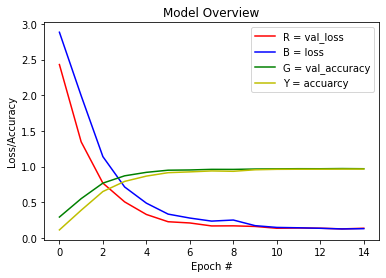

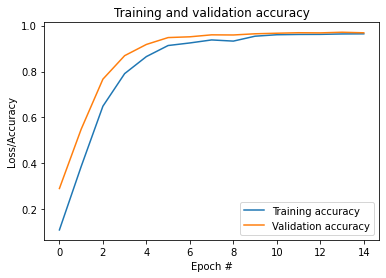

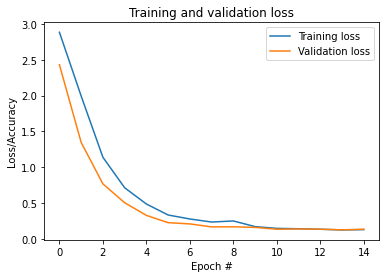

In [16]:
# Declare vars for the plotting of figures 
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

# overall model scoreing 
plt.plot(val_loss, 'r', loss, 'b', val_accuracy, 'g', accuracy, 'y')
label = 'R = val_loss', 'B = loss', 'G = val_accuracy', 'Y = accuarcy'
plt.title('Model Overview')
plt.legend(label)
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.show()

# Training output 
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.show()

# testing output 
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.show()

In [17]:
model.save(Output + "modelReFIT6.h5")
print("Saved model to disk")

Saved model to disk
